# **Preparing for Clustering**

In [ ]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import MeanShift
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN


data = pd.read_csv('complete_dataset_cleaned.csv')
data=data.iloc[:,:-2]
data.pop('Pkey')
data.pop('date')
data.pop('human_development_index')
data.pop('gdp_percentage_weekly')
data.head()

,continent,location,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,population_density,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,icu_patients_per_million
0,Africa,Algeria,13.423,0.113,1.20,0.0,74.07,17.348,13913.839,278.364,6.73,0.7,30.4,1.9,76.88,1.403
1,Africa,Algeria,13.604,0.249,1.18,0.0,74.07,17.348,13913.839,278.364,6.73,0.7,30.4,1.9,76.88,1.517
2,Africa,Algeria,13.740,0.204,1.15,0.0,74.07,17.348,13913.839,278.364,6.73,0.7,30.4,1.9,76.88,1.449
3,Africa,Algeria,13.287,0.294,1.14,0.0,74.07,17.348,13913.839,278.364,6.73,0.7,30.4,1.9,76.88,1.268
4,Africa,Algeria,13.446,0.249,1.13,0.0,74.07,17.348,13913.839,278.364,6.73,0.7,30.4,1.9,76.88,1.154


In [ ]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [ ]:
data=data[data.location!='Bolivia']
data=data[data.location!='Luxembourg']

index=data.iloc[:,1]

In [ ]:
#data=clean_dataset(data.iloc[:,1:])

In [ ]:
data=data.iloc[:,2:]
data

,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,population_density,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,icu_patients_per_million
0,13.423,0.113,1.20,0.0,74.07,17.348,13913.839,278.364,6.73,0.7,30.4,1.90,76.88,1.403
1,13.604,0.249,1.18,0.0,74.07,17.348,13913.839,278.364,6.73,0.7,30.4,1.90,76.88,1.517
2,13.740,0.204,1.15,0.0,74.07,17.348,13913.839,278.364,6.73,0.7,30.4,1.90,76.88,1.449
3,13.287,0.294,1.14,0.0,74.07,17.348,13913.839,278.364,6.73,0.7,30.4,1.90,76.88,1.268
4,13.446,0.249,1.13,0.0,74.07,17.348,13913.839,278.364,6.73,0.7,30.4,1.90,76.88,1.154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28366,217.809,1.166,0.86,0.0,25.99,35.608,54225.446,151.089,10.79,19.1,24.6,2.77,78.86,7.875
28367,22.659,0.139,0.86,0.0,25.99,35.608,54225.446,151.089,10.79,19.1,24.6,2.77,78.86,7.772
28368,14.905,0.012,0.86,0.0,25.99,35.608,54225.446,151.089,10.79,19.1,24.6,2.77,78.86,7.852
28369,64.914,0.347,0.86,0.0,25.99,35.608,54225.446,151.089,10.79,19.1,24.6,2.77,78.86,7.855


In [ ]:
#data.dropna()

In [ ]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [ ]:
count=1

In [ ]:
import warnings
warnings.filterwarnings('ignore') # 
kmean_avg_dist, gmm_avg_dist= [],[]


In [ ]:
"""sf=[]
for i in X.columns:
  k=KMeans(n_clusters=4)
  d= X[[i]]
  k.fit(d,y)
  pred=k.predict(d)
  s=metrics.silhouette_score(d,pred)
  print("Score for",i,":",s)
  """

'sf=[]\nfor i in X.columns:\n  k=KMeans(n_clusters=4)\n  d= X[[i]]\n  k.fit(d,y)\n  pred=k.predict(d)\n  s=metrics.silhouette_score(d,pred)\n  print("Score for",i,":",s)\n  '

In [ ]:
#X=X.iloc[:,[0,1,3,5,6,7,8,11]]

In [ ]:

from sklearn.base import warnings
while (count<8): 
 count=count+1
 # training gaussian mixture model 
 gmm = GaussianMixture(n_components=count)
 gmm.fit(X)
 #predictions from gmm
 labels = gmm.predict(X)
 score_GMM=metrics.silhouette_score(X,labels)
 print("Silhouette score for",count,"clusters:","GMM:",score_GMM)


Silhouette score for 2 clusters: GMM: 0.4758466373084356
Silhouette score for 3 clusters: GMM: 0.6179563298224336
Silhouette score for 4 clusters: GMM: 0.5422873856400845
Silhouette score for 5 clusters: GMM: 0.5806313934764288
Silhouette score for 6 clusters: GMM: 0.6180521606906695
Silhouette score for 7 clusters: GMM: 0.54718223620914
Silhouette score for 8 clusters: GMM: 0.6033958416898679


In [ ]:
count=1
from sklearn.base import warnings
while (count<8): 
 count=count+1
 #training k-means model
 kmeans = KMeans(n_clusters=count)
 kmeans.fit(X)
 #predictions from kmeans
 pred = kmeans.predict(X)
 #frame = pd.DataFrame(X)
 score_Kmeans= metrics.silhouette_score(X,pred)
 kmean_avg_dist.append(kmeans.inertia_)
 print("Silhouette score for",count,"clusters Kmeans:",score_Kmeans)

Silhouette score for 2 clusters Kmeans: 0.5751385427689136
Silhouette score for 3 clusters Kmeans: 0.6167244016630191
Silhouette score for 4 clusters Kmeans: 0.646604150316168
Silhouette score for 5 clusters Kmeans: 0.6060547372056396
Silhouette score for 6 clusters Kmeans: 0.6180521606906695
Silhouette score for 7 clusters Kmeans: 0.6138065990512672
Silhouette score for 8 clusters Kmeans: 0.5875769217846759


In [ ]:
"""count=1
#from sklearn.base import warnings
#while (count<8): 
# count=count+1
 #training spectral model
spectral = SpectralClustering(n_clusters=4)
spectral.fit(X)
#predictions
sp_labels = spectral.predict(X)
 
score_SP= metrics.silhouette_score(X,sp_labels)
print("Silhouette score for",4,"clusters Spectral:",score_SP)
"""

'count=1\n#from sklearn.base import warnings\n#while (count<8): \n# count=count+1\n #training spectral model\nspectral = SpectralClustering(n_clusters=4)\nspectral.fit(X)\n#predictions\nsp_labels = spectral.predict(X)\n \nscore_SP= metrics.silhouette_score(X,sp_labels)\nprint("Silhouette score for",4,"clusters Spectral:",score_SP)\n'

In [ ]:
"""count=1
from sklearn.base import warnings
while (count<8): 
 count=count+1
 #Hierarchical 
 hierarchical_cluster = AgglomerativeClustering(n_clusters=count, affinity='euclidean', linkage='ward')
 hc_labels=hierarchical_cluster.fit_predict(X)
 #frame = pd.DataFrame(X)
 score_HC= metrics.silhouette_score(X,hc_labels)
 print("Silhouette score for",count,"clusters Hierarchical/Agglomerative:",score_HC)
 """

'count=1\nfrom sklearn.base import warnings\nwhile (count<8): \n count=count+1\n #Hierarchical \n hierarchical_cluster = AgglomerativeClustering(n_clusters=count, affinity=\'euclidean\', linkage=\'ward\')\n hc_labels=hierarchical_cluster.fit_predict(X)\n #frame = pd.DataFrame(X)\n score_HC= metrics.silhouette_score(X,hc_labels)\n print("Silhouette score for",count,"clusters Hierarchical/Agglomerative:",score_HC)\n '

In [ ]:
"""#training affinity propagation model
ap = AffinityPropagation(preference=-5, damping=0.95)
ap.fit(X)
#predictions from kmeans
ap_labels = ap.predict(X)
metrics.silhouette_score(X,ap_labels)
"""

'#training affinity propagation model\nap = AffinityPropagation(preference=-5, damping=0.95)\nap.fit(X)\n#predictions from kmeans\nap_labels = ap.predict(X)\nmetrics.silhouette_score(X,ap_labels)\n'

In [ ]:
"""#training means shift model
ms = MeanShift()
ms.fit(X)
#predictions from kmeans
ms_labels = ms.predict(X)
metrics.silhouette_score(X,ms_labels)
"""

'#training means shift model\nms = MeanShift()\nms.fit(X)\n#predictions from kmeans\nms_labels = ms.predict(X)\nmetrics.silhouette_score(X,ms_labels)\n'

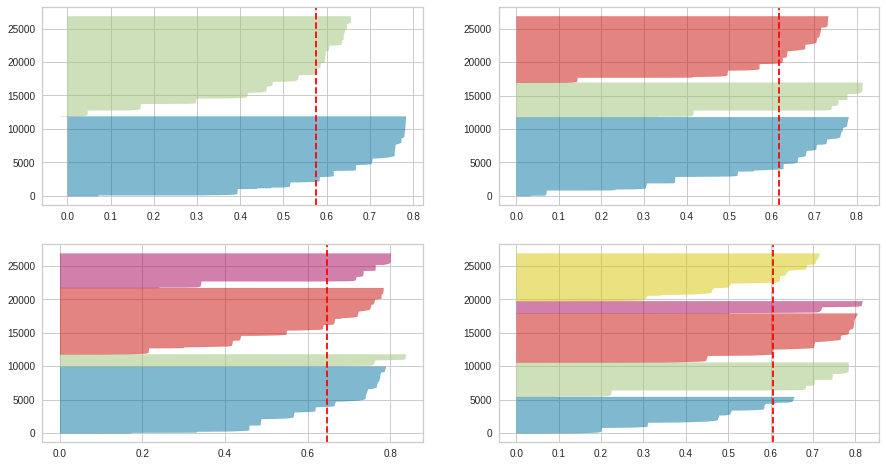

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

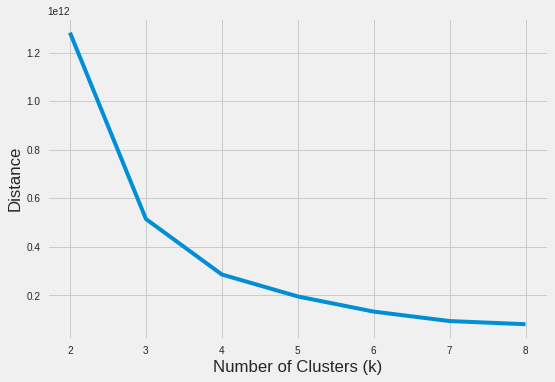

In [ ]:
range_n_clusters=[2,3,4,5,6,7,8]
import matplotlib.style as style
style.use("fivethirtyeight")
plt.plot(range_n_clusters, kmean_avg_dist)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Distance")
plt.show()

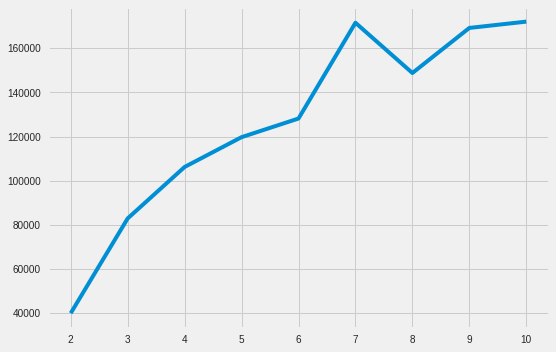

In [ ]:
from sklearn.metrics import calinski_harabasz_score
scores = pd.DataFrame()
components = 11
for n in range(2,components):
    model = GaussianMixture(n_components=n)
    y = model.fit_predict(X)
    scores.loc[n,'score'] = calinski_harabasz_score(X,y)
plt.plot(scores.reset_index()['index'],scores['score'])

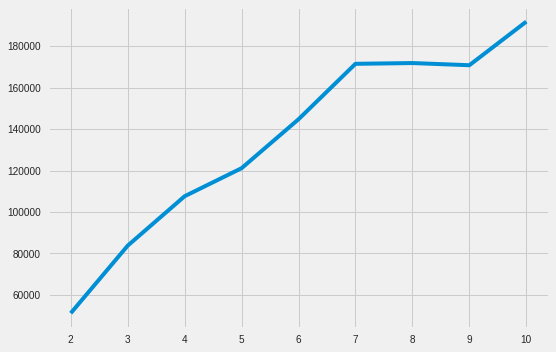

In [ ]:
from sklearn.metrics import calinski_harabasz_score
scores = pd.DataFrame()
components = 11
for n in range(2,components):
    model = KMeans(n_clusters=n)
    y = model.fit_predict(X)
    scores.loc[n,'score'] = calinski_harabasz_score(X,y)
plt.plot(scores.reset_index()['index'],scores['score'])

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
#predictions from kmeans
pred = kmeans.predict(X)
gmm=GaussianMixture(n_components=3)
gmm.fit(X,y)
#predictions from gmm
labels = gmm.predict(X)
cluster=pd.DataFrame(data={'country':index,'Kmeans':pred,'GMM':labels})
cluster

,country,Kmeans,GMM
0,Algeria,0,1
1,Algeria,0,1
2,Algeria,0,1
3,Algeria,0,1
4,Algeria,0,1
...,...,...,...
28366,United States,1,0
28367,United States,1,0
28368,United States,1,0
28369,United States,1,0


In [ ]:
centers=pd.DataFrame(kmeans.cluster_centers_)

In [ ]:
centers

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,204.034410,2.985770,1.022102,43.892739,51.378474,44.739065,16879.177212,284.544706,7.188809,22.356691,36.943929,4.158078,74.785103
1,426.310985,1.878778,1.067923,74.280578,47.784473,154.666322,47138.224589,125.663029,6.321639,20.905761,24.577186,4.228336,81.923546
2,469.983872,2.508955,1.054802,67.174258,48.985450,193.439861,32915.542610,161.701106,7.322613,19.555816,35.557247,4.826546,80.952525


In [ ]:
from numpy.ma.extras import average
cluster=cluster.groupby('country').mean()
cluster

,Kmeans,GMM
country,,
Algeria,0.0,1.000000
Argentina,0.0,1.000000
Australia,1.0,0.000000
Austria,1.0,0.000000
Belgium,1.0,0.000000
Bulgaria,0.0,1.000000
Canada,1.0,0.000000
Chile,0.0,1.000000
Cyprus,2.0,2.000000


In [ ]:
data = pd.read_csv('complete_dataset_cleaned.csv')
data=data.iloc[:,:-3]
data.pop('Pkey')
data.pop('date')
data.pop('human_development_index')
data.pop('gdp_percentage_weekly')
data=data[data.location!='Bolivia']
data=data[data.location!='Luxembourg']
data4=data.groupby('location').mean()


In [ ]:
unclean_data=pd.read_csv('complete_dataset_uncleaned.csv')
unclean_data

,Pkey,continent,location,date,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,population_density,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,icu_patients_per_million
0,Afghanistan43885,Asia,Afghanistan,2/24/2020,0.125,NaN,NaN,NaN,8.33,54.422,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,NaN
1,Afghanistan43886,Asia,Afghanistan,2/25/2020,0.000,NaN,NaN,NaN,8.33,54.422,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,NaN
2,Afghanistan43887,Asia,Afghanistan,2/26/2020,0.000,NaN,NaN,NaN,8.33,54.422,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,NaN
3,Afghanistan43888,Asia,Afghanistan,2/27/2020,0.000,NaN,NaN,NaN,8.33,54.422,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,NaN
4,Afghanistan43889,Asia,Afghanistan,2/28/2020,0.000,NaN,NaN,NaN,8.33,54.422,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210475,Zimbabwe44842,Africa,Zimbabwe,10/8/2022,0.000,0.0,NaN,NaN,NaN,42.729,1899.775,307.846,1.82,1.6,30.7,1.7,61.49,NaN
210476,Zimbabwe44843,Africa,Zimbabwe,10/9/2022,0.000,0.0,NaN,76.42,NaN,42.729,1899.775,307.846,1.82,1.6,30.7,1.7,61.49,NaN
210477,Zimbabwe44844,Africa,Zimbabwe,10/10/2022,5.877,0.0,NaN,NaN,NaN,42.729,1899.775,307.846,1.82,1.6,30.7,1.7,61.49,NaN
210478,Zimbabwe44845,Africa,Zimbabwe,10/11/2022,0.000,0.0,NaN,NaN,NaN,42.729,1899.775,307.846,1.82,1.6,30.7,1.7,61.49,NaN


In [ ]:
data2=unclean_data.groupby('location').mean()

In [ ]:
#data2=unclean_data.iloc[:,3:]
#data2.head()

In [ ]:
data2

,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,population_density,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,icu_patients_per_million
location,,,,,,,,,,,,,,
Afghanistan,5.214554,0.208511,1.063653,11.989079,31.742777,54.422,1803.987,597.029,9.59,NaN,NaN,0.50,64.83,NaN
Albania,122.883366,1.329693,1.040174,46.112985,48.009245,104.871,11803.431,304.195,10.08,7.1,51.2,2.89,78.57,NaN
Algeria,6.376680,0.164828,1.003690,24.122857,60.078759,17.348,13913.839,278.364,6.73,0.7,30.4,1.90,76.88,0.499116
Andorra,614.302520,2.126884,0.893998,102.127818,37.924314,163.755,NaN,109.135,7.97,29.0,37.8,0.00,83.73,NaN
Angola,3.189961,0.060064,0.837355,25.264103,58.486120,23.890,5819.495,276.045,3.94,NaN,NaN,0.00,61.15,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wallis and Futuna,90.402084,1.054375,NaN,85.564444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,79.94,NaN
Western Sahara,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,70.26,NaN
Yemen,0.395666,0.073016,0.774292,1.849394,30.292464,53.508,1479.147,495.003,5.35,7.6,29.2,0.70,66.12,NaN


In [ ]:
Ind=pd.DataFrame(data2[data2.index=='India'])
Ind

,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,population_density,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,icu_patients_per_million
location,,,,,,,,,,,,,,
India,32.151333,0.392466,1.057508,80.891623,62.976765,450.419,6426.674,282.28,10.39,1.9,20.6,0.53,69.66,NaN


In [ ]:
ind=kmeans.predict(Ind.iloc[:,:-1])
ind=int(ind)
c_countries= cluster.index[cluster.Kmeans==ind]
c_countries

Index(['Algeria', 'Argentina', 'Bulgaria', 'Chile', 'Romania', 'Serbia',
       'South Africa'],
      dtype='object', name='country')

In [ ]:
dist=[]
from scipy.spatial import distance
for c in c_countries:
  a=data4[data4.index==c]
  b=centers.iloc[ind,:]
  dst = distance.euclidean(a, b)
  dist.append(dst)
  i=i+1

In [ ]:
dst_center=pd.DataFrame(dist,c_countries)
dst_center.columns=['distance']
dst_center

,distance
country,
Algeria,2972.429883
Argentina,2059.748621
Bulgaria,1690.248492
Chile,5890.881262
Romania,6435.025727
Serbia,2839.515933
South Africa,4586.964004


In [ ]:
dst_center=dst_center.sort_values(by=['distance'])
dst_center=dst_center.iloc[:2,:]
dst_center

,distance
country,
Bulgaria,1690.248492
Argentina,2059.748621


# **Predictions**

In [ ]:
data = pd.read_csv('complete_dataset_cleaned.csv')

In [ ]:
c_countries=list(dst_center.index)
c_countries

['Bulgaria', 'Argentina']

In [ ]:
data_new=data.loc[data['location'].isin(c_countries)]

In [ ]:
data=data_new.iloc[:,:-2]
data.pop('Pkey')
data.set_index('date', inplace=True)
data.pop('human_development_index')
data.head()

,continent,location,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,gdp_percentage_weekly,population_density,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,icu_patients_per_million
date,,,,,,,,,,,,,,,,,
7/1/2020,South America,Argentina,58.904,0.972,1.18,0.0,92.59,NaN,16.177,18933.907,191.032,5.5,16.2,27.7,5.0,76.67,12.722
7/2/2020,South America,Argentina,60.605,0.751,1.18,0.0,92.59,NaN,16.177,18933.907,191.032,5.5,16.2,27.7,5.0,76.67,13.119
7/3/2020,South America,Argentina,62.836,1.148,1.18,0.0,92.59,NaN,16.177,18933.907,191.032,5.5,16.2,27.7,5.0,76.67,13.694
7/4/2020,South America,Argentina,57.204,0.972,1.18,0.0,92.59,NaN,16.177,18933.907,191.032,5.5,16.2,27.7,5.0,76.67,14.069
7/5/2020,South America,Argentina,53.869,0.574,1.19,0.0,92.59,-15.455961,16.177,18933.907,191.032,5.5,16.2,27.7,5.0,76.67,14.533


In [ ]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [ ]:
data=data.iloc[:,1:]
data.pop('population_density')
data.pop('gdp_per_capita')
data.pop('cardiovasc_death_rate')
data.pop('diabetes_prevalence')
data.pop('female_smokers')
data.pop('male_smokers')
data.pop('hospital_beds_per_thousand')
data.pop('life_expectancy')
df=data
df

,location,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,gdp_percentage_weekly,icu_patients_per_million
date,,,,,,,,
7/1/2020,Argentina,58.904,0.972,1.18,0.00,92.59,NaN,12.722
7/2/2020,Argentina,60.605,0.751,1.18,0.00,92.59,NaN,13.119
7/3/2020,Argentina,62.836,1.148,1.18,0.00,92.59,NaN,13.694
7/4/2020,Argentina,57.204,0.972,1.18,0.00,92.59,NaN,14.069
7/5/2020,Argentina,53.869,0.574,1.19,0.00,92.59,-15.455961,14.533
...,...,...,...,...,...,...,...,...
10/5/2022,Bulgaria,104.707,0.581,1.17,66.13,11.11,5.059064,6.826
10/6/2022,Bulgaria,99.479,0.581,1.17,66.16,11.11,5.059064,6.826
10/7/2022,Bulgaria,101.222,0.581,1.17,66.19,11.11,5.059064,7.116


In [ ]:
i=1
d=[]
for c in c_countries:
 temp=data[data['location']==c]
 d.append(temp)
 i=i+1

In [ ]:
d[0]

,location,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,gdp_percentage_weekly,icu_patients_per_million
date,,,,,,,,
4/6/2020,Bulgaria,2.614,0.290,1.03,0.00,71.30,NaN,3.776
4/7/2020,Bulgaria,4.066,0.145,1.01,0.00,71.30,NaN,3.776
4/8/2020,Bulgaria,2.324,0.145,0.99,0.00,71.30,NaN,3.921
4/9/2020,Bulgaria,3.631,0.000,0.99,0.00,71.30,NaN,4.647
4/10/2020,Bulgaria,2.469,0.145,1.00,0.00,71.30,NaN,4.792
...,...,...,...,...,...,...,...,...
10/5/2022,Bulgaria,104.707,0.581,1.17,66.13,11.11,5.059064,6.826
10/6/2022,Bulgaria,99.479,0.581,1.17,66.16,11.11,5.059064,6.826
10/7/2022,Bulgaria,101.222,0.581,1.17,66.19,11.11,5.059064,7.116


# **Plot Your Data**

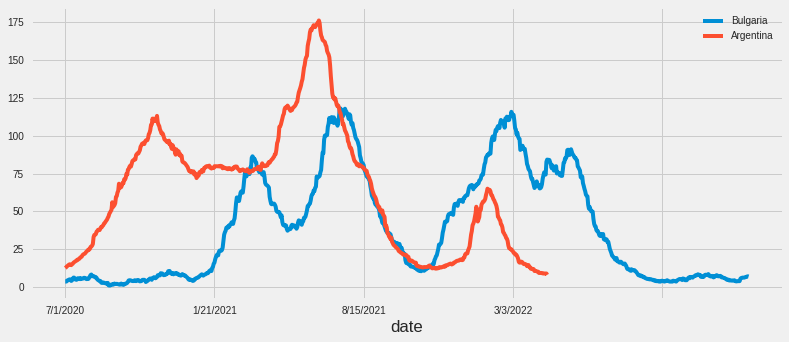

In [ ]:
i=0
for c in c_countries:
  d[i].icu_patients_per_million.plot(figsize=(12,5), label=c)
  plt.legend(loc="upper right")
  i=i+1

# **Check For Stationarity**

In [ ]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

In [ ]:
adf_test(df['icu_patients_per_million'])

1. ADF :  -3.3342795858724674
2. P-Value :  0.01341400494912428
3. Num Of Lags :  21
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 1542
5. Critical Values :
	 1% :  -3.4345978724183603
	 5% :  -2.863416175501975
	 10% :  -2.567768846731635


# **Model for country 1**

In [ ]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
print("stepwise model for", d[0].location[2])
data1=d[0].iloc[:,1:]
data1=clean_dataset(data1)
data1
stepwise_fit = auto_arima(data1['icu_patients_per_million'],exog=data1.iloc[:,1:6], start_P=1,start_Q=1, start_D=1, m=7  ,trace=True, seasonal=True,
                          suppress_warnings=True)
print(data1.shape)
train=data1.iloc[:-30,:]
test=data1.iloc[-30:,:]
print(train.shape,test.shape)
#print(test.iloc[0],test.iloc[-1])

stepwise model for Bulgaria
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=3266.003, Time=4.10 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=3450.615, Time=0.25 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=3336.460, Time=0.60 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=3355.883, Time=0.87 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=3448.617, Time=0.31 sec
 ARIMA(2,1,2)(0,0,1)[7] intercept   : AIC=3270.803, Time=3.89 sec
 ARIMA(2,1,2)(1,0,0)[7] intercept   : AIC=3269.890, Time=3.11 sec
 ARIMA(2,1,2)(2,0,1)[7] intercept   : AIC=3267.968, Time=9.59 sec
 ARIMA(2,1,2)(1,0,2)[7] intercept   : AIC=3267.960, Time=13.37 sec
 ARIMA(2,1,2)(0,0,0)[7] intercept   : AIC=3277.514, Time=1.15 sec
 ARIMA(2,1,2)(0,0,2)[7] intercept   : AIC=3271.083, Time=3.11 sec
 ARIMA(2,1,2)(2,0,0)[7] intercept   : AIC=3269.493, Time=2.34 sec
 ARIMA(2,1,2)(2,0,2)[7] intercept   : AIC=3269.893, Time=5.43 sec
 ARIMA(1,1,2)(1,0,1)[7] intercept   : AIC=3265.626, Time=2.91 sec
 ARI

30
2.7619562324779543


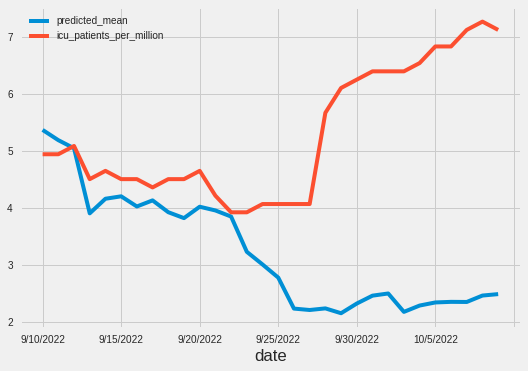

In [ ]:
modela=ARIMA(endog=train['icu_patients_per_million'],exog=train.iloc[:,0:5] ,order=(1,1,1),seasonal_order=(1,0,1,30) )
modela=modela.fit()
modela.summary()
start=len(train)
end=len(train)+len(test)-1
pred=modela.predict(exog=test.iloc[:,0:5],start=start,end=end)
pred.index=df.index[start:end+1]
print(len(pred))
pred.plot(legend='ARIMA Predictions')
test['icu_patients_per_million'].plot(legend=True)
test['icu_patients_per_million'].mean()
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['icu_patients_per_million']))
print(rmse)

## **PREPING DATA FOR ANN**


In [ ]:
predicted_list, error_list = [], []
training_data = train
modela = ARIMA(endog=train['icu_patients_per_million'],exog=train.iloc[:,0:5] ,order=(1,1,1),seasonal_order=(1,0,1,30))
model_fit = modela.fit()
for t in range(len(test)):
    predicted_value = pred[t]
    error_list.append(test.iloc[t,-1] - predicted_value)
    predicted_list.append(predicted_value)
    obs = test.iloc[t,-1]
    training_data[t]=obs
    
error = mean_squared_error(test.iloc[0:30,-1], predicted_list[0:30])
print('Test MSE: %.3f' % error)
training_error = model_fit.resid
training_error=np.array(training_error)

Test MSE: 7.628


##**Building ann model to predict error by seeing the previous 7 day error in prediction**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Activation
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error as mse

model = Sequential()
model.add(Dense(50, input_dim=7, activation="tanh"))
model.add(Dense(25,  activation="tanh"))
model.add(Dense(25,  activation="tanh"))
model.add(Dense(1))
model.add(Activation("linear"))
model.compile(loss='mean_squared_error', optimizer='adam')
train_X,train_Y = [],[]
for i in range(0 , len(training_error) - 7):
    train_X.append(training_error[i:i+7])
    train_Y.append(training_error[i+7])

train_X=np.array(train_X)
train_Y=np.array(train_Y)
new_train_X,new_train_Y = [],[]
for i in train_X:
    new_train_X.append(i.reshape(-1)) 
for i in train_Y:
    new_train_Y.append(i.reshape(-1))
new_train_X = np.array(new_train_X)
new_train_Y = np.array(new_train_Y)
model.fit(new_train_X,new_train_Y, epochs=400, batch_size=20,verbose=1)
test_data = []
for i in error_list:
    try:
        test_data.append(i[0])
    except:
        test_data.append(i)
test_data = np.array(test_data)

Epoch 1/400
44/44 [==============================] - 1s 2ms/step - loss: 2.3215
Epoch 2/400
44/44 [==============================] - 0s 2ms/step - loss: 2.1145
Epoch 3/400
44/44 [==============================] - 0s 2ms/step - loss: 2.0766
Epoch 4/400
44/44 [==============================] - 0s 2ms/step - loss: 2.0499
Epoch 5/400
44/44 [==============================] - 0s 2ms/step - loss: 2.0234
Epoch 6/400
44/44 [==============================] - 0s 2ms/step - loss: 1.9988
Epoch 7/400
44/44 [==============================] - 0s 2ms/step - loss: 1.9700
Epoch 8/400
44/44 [==============================] - 0s 2ms/step - loss: 1.9439
Epoch 9/400
44/44 [==============================] - 0s 2ms/step - loss: 1.9181
Epoch 10/400
44/44 [==============================] - 0s 1ms/step - loss: 1.8945
Epoch 11/400
44/44 [==============================] - 0s 2ms/step - loss: 1.8791
Epoch 12/400
44/44 [==============================] - 0s 2ms/step - loss: 1.8540
Epoch 13/400
44/44 [=================

1/1 [==============================] - 0s 90ms/step


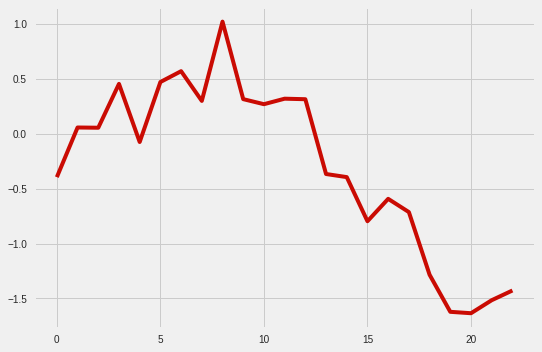

Test MSE: 14.105


In [ ]:
test_X,test_Y = [],[]
for i in range(0 , len(test_data) - 7):
    test_X.append(test_data[i:i+7])
    test_Y.append(test_data[i+7])

new_test_X,new_test_Y = [],[]
for i in test_X:
    new_test_X.append(i.reshape(-1))
for i in test_Y:
    new_test_Y.append(i.reshape(-1))
new_test_X = np.array(new_test_X)
new_test_Y = np.array(new_test_Y)

predictions = model.predict(new_test_X)

Y = pd.DataFrame(new_test_Y)
pred = pd.DataFrame(predictions)

import matplotlib.pyplot as plt
plt.plot(predictions , color = 'r')
plt.show()
error = mse(test_data[7:],predictions)
print('Test MSE: %.3f' % error)

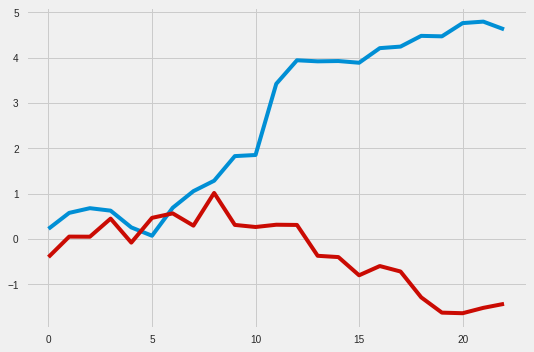

Test MSE: 14.105


In [ ]:
plt.plot(Y)
plt.plot(pred , color = 'r')
#p.plot()
plt.show()
error = mse(test_data[7:],predictions)
print('Test MSE: %.3f' % error)

##**Calculating the sum of prediction value by arima and amount error by the ann***

Test MSE: 7.089


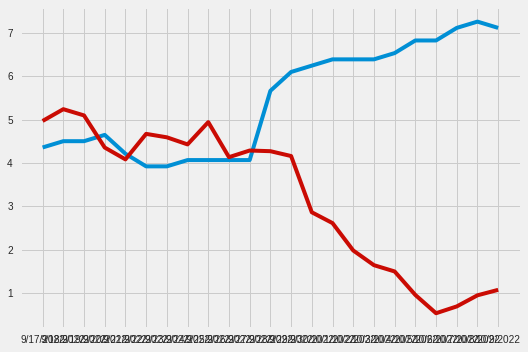

In [ ]:
pred=np.array(pred)
pred= pred.tolist()
l= len(pred)
pred_final=[]
for i in range(l):
 temp = pred[i] + predicted_list[i]
 pred_final.append(temp)
error = mse(test.iloc[:23,-1],pred_final)
print('Test MSE: %.3f' % error)
Y = pd.DataFrame(test.iloc[7:,-1])
pred = pd.DataFrame(pred_final)
plt.plot(Y)
plt.plot(pred , color = 'r')
plt.rcParams['figure.figsize'] = [20, 5]
#p.plot()
plt.show()

# **Predicting for new country using Model 1**


In [ ]:
data3=unclean_data[unclean_data.location=='India']

In [ ]:
data3=data3.iloc[:,2:]
data3.pop('location')
data3.pop('population_density')
data3.pop('gdp_per_capita')
data3.pop('cardiovasc_death_rate')
data3.pop('diabetes_prevalence')
data3.pop('female_smokers')
data3.pop('male_smokers')
data3.pop('hospital_beds_per_thousand')
data3.pop('life_expectancy')
data3.set_index('date', inplace=True)
data3.tail()

,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,icu_patients_per_million
date,,,,,,
10/8/2022,1.958,0.015,NaN,155.54,NaN,NaN
10/9/2022,1.722,0.011,NaN,155.57,NaN,NaN
10/10/2022,1.390,0.006,NaN,155.59,NaN,NaN
10/11/2022,NaN,0.009,NaN,155.63,NaN,NaN
10/12/2022,3.612,0.009,NaN,155.68,NaN,NaN


In [ ]:
data3=data3.iloc[:,:-1]
data3=data3.dropna()
traini=data3.iloc[:-30,:]
testi=data3.iloc[-30:,:]

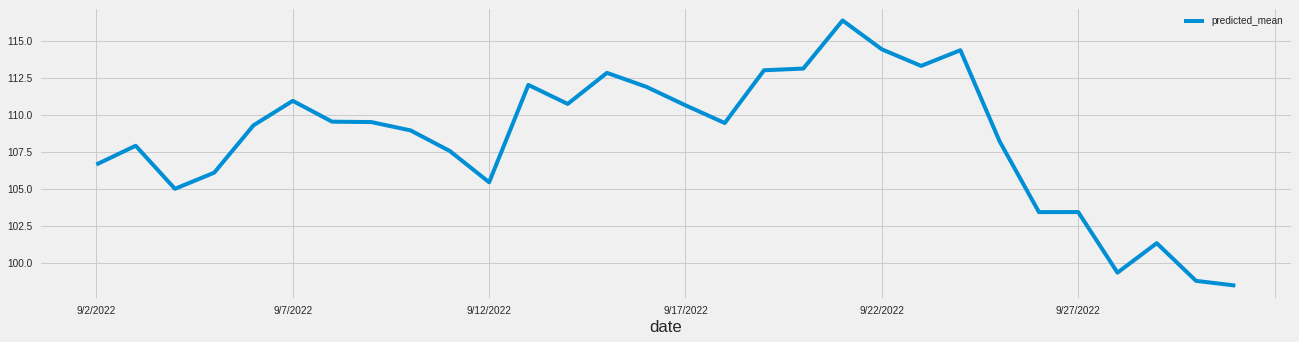

In [ ]:
modela=ARIMA(endog=train['icu_patients_per_million'],exog=train.iloc[:,0:5] ,order=(1,1,1),seasonal_order=(1,0,1,30) )
modela=modela.fit()
modela.summary()
start=len(traini)
end=len(traini)+len(testi)-1
pred=modela.predict(exog=testi.iloc[:,0:5],start=start,end=end)
pred.index=data3.index[start:end+1]
pred.plot(legend='ARIMA Predictions')

In [ ]:
pred=pd.DataFrame(pred)
pred=pred.iloc[7:,:]
predictions=pd.DataFrame(predictions)
predictions.values.tolist()
predictions=predictions[0]
predictions.values.tolist()
predictions


0    -0.396086
1     0.055661
2     0.053498
3     0.452416
4    -0.076401
5     0.469364
6     0.567988
7     0.297709
8     1.018989
9     0.313718
10    0.267703
11    0.317696
12    0.312998
13   -0.367582
14   -0.395790
15   -0.797329
16   -0.593580
17   -0.714022
18   -1.284234
19   -1.621425
20   -1.634195
21   -1.515813
22   -1.427424
Name: 0, dtype: float32

In [ ]:
pred=np.array(pred)
pred= pred.tolist()
l= len(pred)
pred_final=[]
for i in range(l):
 temp = pred[i] + predictions[i]
 pred_final.append(temp)
 print(temp)
#error = mse(test.iloc[:23,-1],pred_final)
#print('Test MSE: %.3f' % error)
#Y = pd.DataFrame(testi.iloc[7:,-1])
pred_final = pd.DataFrame(pred_final)

#plt.plot(pred_final , color = 'r')
#plt.show()

[109.10287732]
[108.99149722]
[107.59534998]
[105.88202576]
[111.93578355]
[111.19636735]
[113.39480077]
[112.18444409]
[111.65256427]
[109.7497224]
[113.26929649]
[113.43457221]
[116.68272712]
[114.04966471]
[112.90191913]
[113.55963999]
[107.59555648]
[102.69942192]
[102.13137476]
[97.6999804]
[99.67915695]
[97.24906995]
[97.02043909]


In [ ]:
p1=pred_final
pred_final

,0
0,109.102877
1,108.991497
2,107.595350
3,105.882026
4,111.935784
5,111.196367
6,113.394801
7,112.184444
8,111.652564
9,109.749722


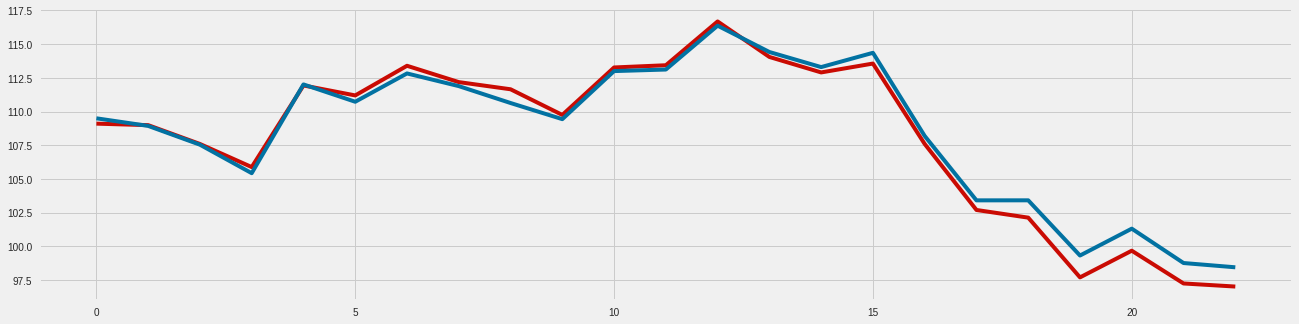

In [ ]:
plt.plot(pred_final , label="ARIMA+ANN", color = 'r')
plt.plot(pred , label="ARIMA", color = 'b')

plt.show()

# **Model for country 2**

In [ ]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
print("stepwise model for", d[1].location[2])
data1=d[1].iloc[:,1:]
data1=clean_dataset(data1)
data1
stepwise_fit = auto_arima(data1['icu_patients_per_million'],exog=data1.iloc[:,1:6], start_P=1,start_Q=1, start_D=1, m=7  ,trace=True, seasonal=True,
                          suppress_warnings=True)
print(data1.shape)
train=data1.iloc[:-30,:]
test=data1.iloc[-30:,:]
print(train.shape,test.shape)
#print(test.iloc[0],test.iloc[-1])

stepwise model for Argentina
Performing stepwise search to minimize aic
 ARIMA(2,2,2)(1,0,1)[7]             : AIC=inf, Time=2.16 sec
 ARIMA(0,2,0)(0,0,0)[7]             : AIC=2486.490, Time=0.17 sec
 ARIMA(1,2,0)(1,0,0)[7]             : AIC=2281.368, Time=0.26 sec
 ARIMA(0,2,1)(0,0,1)[7]             : AIC=2152.393, Time=0.26 sec
 ARIMA(0,2,1)(0,0,0)[7]             : AIC=2152.281, Time=0.15 sec
 ARIMA(0,2,1)(1,0,0)[7]             : AIC=2152.146, Time=0.23 sec
 ARIMA(0,2,1)(2,0,0)[7]             : AIC=2151.406, Time=0.30 sec
 ARIMA(0,2,1)(2,0,1)[7]             : AIC=inf, Time=1.58 sec
 ARIMA(0,2,1)(1,0,1)[7]             : AIC=inf, Time=1.28 sec
 ARIMA(0,2,0)(2,0,0)[7]             : AIC=2485.602, Time=0.32 sec
 ARIMA(1,2,1)(2,0,0)[7]             : AIC=2152.788, Time=0.58 sec
 ARIMA(0,2,2)(2,0,0)[7]             : AIC=2152.869, Time=0.66 sec
 ARIMA(1,2,0)(2,0,0)[7]             : AIC=2279.829, Time=0.48 sec
 ARIMA(1,2,2)(2,0,0)[7]             : AIC=2154.399, Time=2.37 sec
 ARIMA(0,2,1)(2,0,0

30
0.8986239784498967


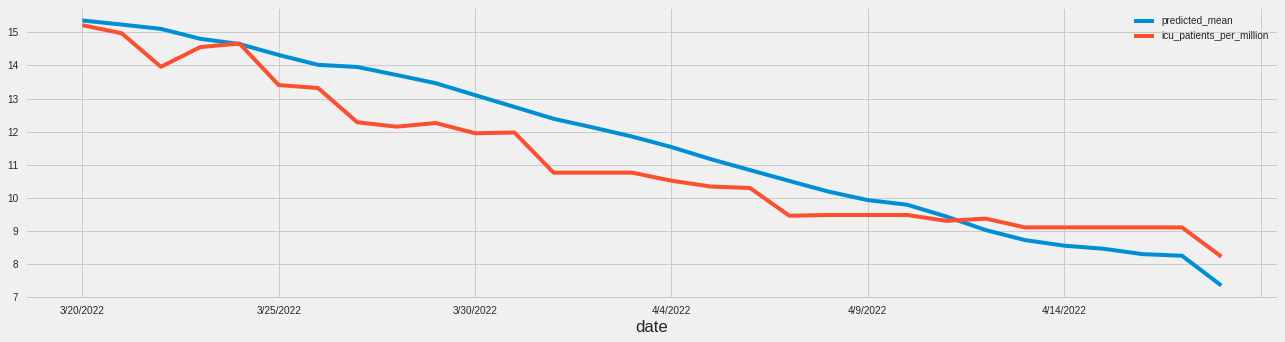

In [ ]:
modela=ARIMA(endog=train['icu_patients_per_million'],exog=train.iloc[:,0:5] ,order=(0,2,1),seasonal_order=(2,0,0,30) )
modela=modela.fit()
modela.summary()
start=len(train)
end=len(train)+len(test)-1
pred=modela.predict(exog=test.iloc[:,0:5],start=start,end=end)
pred.index=df.index[start:end+1]
print(len(pred))
pred.plot(legend='ARIMA Predictions')
test['icu_patients_per_million'].plot(legend=True)
test['icu_patients_per_million'].mean()
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['icu_patients_per_million']))
print(rmse)

## **PREPING DATA FOR ANN**


In [ ]:
predicted_list, error_list = [], []
training_data = train
modela = ARIMA(endog=train['icu_patients_per_million'],exog=train.iloc[:,0:5] ,order=(0,2,1),seasonal_order=(2,0,0,30))
model_fit = modela.fit()
for t in range(len(test)):
    predicted_value = pred[t]
    error_list.append(test.iloc[t,-1] - predicted_value)
    predicted_list.append(predicted_value)
    obs = test.iloc[t,-1]
    training_data[t]=obs
    
error = mean_squared_error(test.iloc[0:30,-1], predicted_list[0:30])
print('Test MSE: %.3f' % error)
training_error = model_fit.resid
training_error=np.array(training_error)

Test MSE: 0.808


##**Building ann model to predict error by seeing the previous 7 day error in prediction**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Activation
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error as mse

model = Sequential()
model.add(Dense(50, input_dim=7, activation="tanh"))
model.add(Dense(25,  activation="tanh"))
model.add(Dense(25,  activation="tanh"))
model.add(Dense(1))
model.add(Activation("linear"))
model.compile(loss='mean_squared_error', optimizer='adam')
train_X,train_Y = [],[]
for i in range(0 , len(training_error) - 7):
    train_X.append(training_error[i:i+7])
    train_Y.append(training_error[i+7])

train_X=np.array(train_X)
train_Y=np.array(train_Y)
new_train_X,new_train_Y = [],[]
for i in train_X:
    new_train_X.append(i.reshape(-1)) 
for i in train_Y:
    new_train_Y.append(i.reshape(-1))
new_train_X = np.array(new_train_X)
new_train_Y = np.array(new_train_Y)
model.fit(new_train_X,new_train_Y, epochs=400, batch_size=20,verbose=1)
test_data = []
for i in error_list:
    try:
        test_data.append(i[0])
    except:
        test_data.append(i)
test_data = np.array(test_data)

Epoch 1/400
31/31 [==============================] - 0s 2ms/step - loss: 1.7704
Epoch 2/400
31/31 [==============================] - 0s 2ms/step - loss: 1.7160
Epoch 3/400
31/31 [==============================] - 0s 2ms/step - loss: 1.7072
Epoch 4/400
31/31 [==============================] - 0s 2ms/step - loss: 1.6950
Epoch 5/400
31/31 [==============================] - 0s 2ms/step - loss: 1.6730
Epoch 6/400
31/31 [==============================] - 0s 2ms/step - loss: 1.6766
Epoch 7/400
31/31 [==============================] - 0s 2ms/step - loss: 1.6618
Epoch 8/400
31/31 [==============================] - 0s 2ms/step - loss: 1.6625
Epoch 9/400
31/31 [==============================] - 0s 2ms/step - loss: 1.6474
Epoch 10/400
31/31 [==============================] - 0s 2ms/step - loss: 1.6305
Epoch 11/400
31/31 [==============================] - 0s 2ms/step - loss: 1.6098
Epoch 12/400
31/31 [==============================] - 0s 2ms/step - loss: 1.6176
Epoch 13/400
31/31 [=================

1/1 [==============================] - 0s 58ms/step


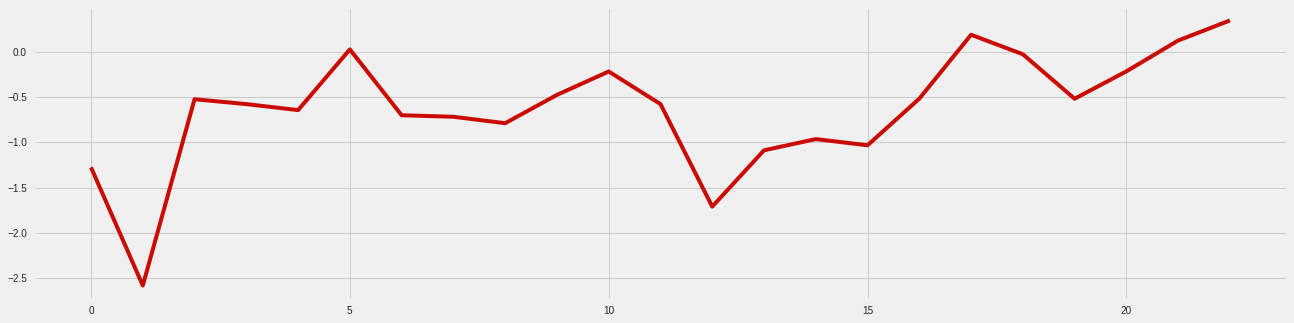

Test MSE: 0.558


In [ ]:
test_X,test_Y = [],[]
for i in range(0 , len(test_data) - 7):
    test_X.append(test_data[i:i+7])
    test_Y.append(test_data[i+7])

new_test_X,new_test_Y = [],[]
for i in test_X:
    new_test_X.append(i.reshape(-1))
for i in test_Y:
    new_test_Y.append(i.reshape(-1))
new_test_X = np.array(new_test_X)
new_test_Y = np.array(new_test_Y)

predictions = model.predict(new_test_X)

Y = pd.DataFrame(new_test_Y)
pred = pd.DataFrame(predictions)

import matplotlib.pyplot as plt
plt.plot(predictions , color = 'r')
plt.show()
error = mse(test_data[7:],predictions)
print('Test MSE: %.3f' % error)

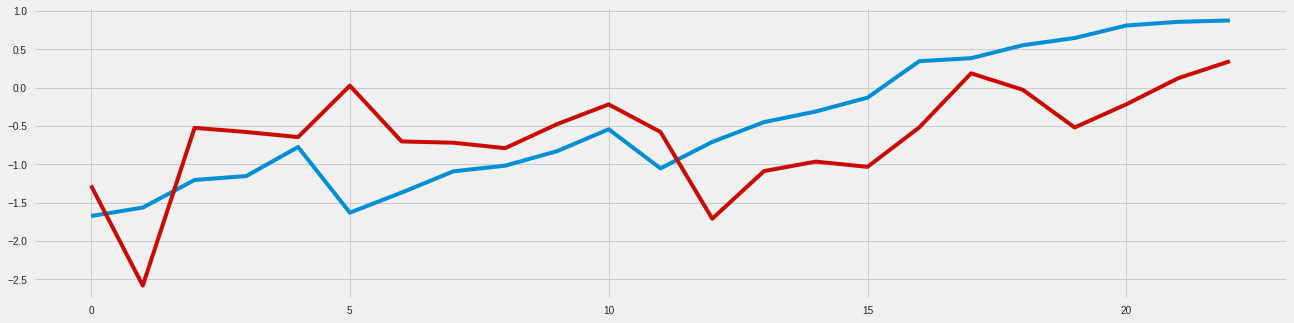

Test MSE: 0.558


In [ ]:
plt.plot(Y)
plt.plot(pred , color = 'r')
#p.plot()
plt.show()
error = mse(test_data[7:],predictions)
print('Test MSE: %.3f' % error)

##**Calculating the sum of prediction value by arima and amount error by the ann***

Test MSE: 0.596


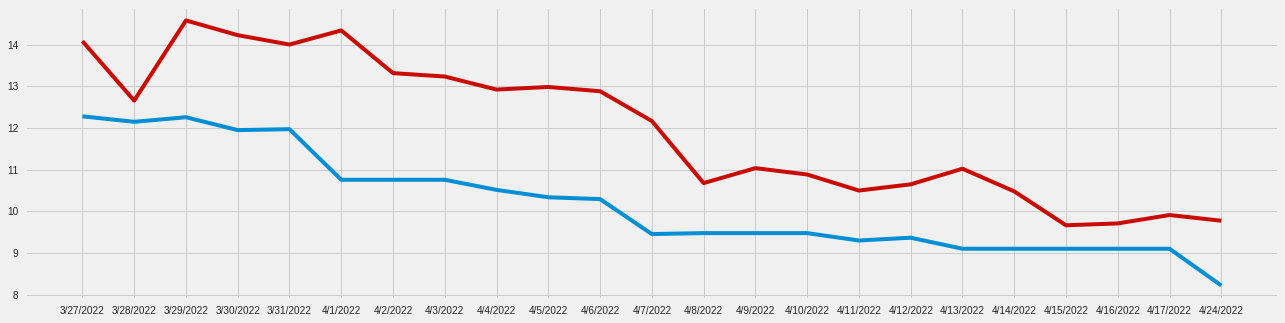

In [ ]:
pred=np.array(pred)
pred= pred.tolist()
l= len(pred)
pred_final=[]
for i in range(l):
 temp = pred[i] + predicted_list[i]
 pred_final.append(temp)
error = mse(test.iloc[:23,-1],pred_final)
print('Test MSE: %.3f' % error)
Y = pd.DataFrame(test.iloc[7:,-1])
pred = pd.DataFrame(pred_final)
plt.plot(Y)
plt.plot(pred , color = 'r')
plt.rcParams['figure.figsize'] = [20, 5]
#p.plot()
plt.show()

# **Predicting for new country using Model 2**


In [ ]:
data3=unclean_data[unclean_data.location=='India']

In [ ]:
data3=data3.iloc[:,2:]
data3.pop('location')
data3.pop('population_density')
data3.pop('gdp_per_capita')
data3.pop('cardiovasc_death_rate')
data3.pop('diabetes_prevalence')
data3.pop('female_smokers')
data3.pop('male_smokers')
data3.pop('hospital_beds_per_thousand')
data3.pop('life_expectancy')
data3.set_index('date', inplace=True)
data3.tail()

,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,icu_patients_per_million
date,,,,,,
10/8/2022,1.958,0.015,NaN,155.54,NaN,NaN
10/9/2022,1.722,0.011,NaN,155.57,NaN,NaN
10/10/2022,1.390,0.006,NaN,155.59,NaN,NaN
10/11/2022,NaN,0.009,NaN,155.63,NaN,NaN
10/12/2022,3.612,0.009,NaN,155.68,NaN,NaN


In [ ]:
data3=data3.iloc[:,:-1]
data3=data3.dropna()
traini=data3.iloc[:-30,:]
testi=data3.iloc[-30:,:]

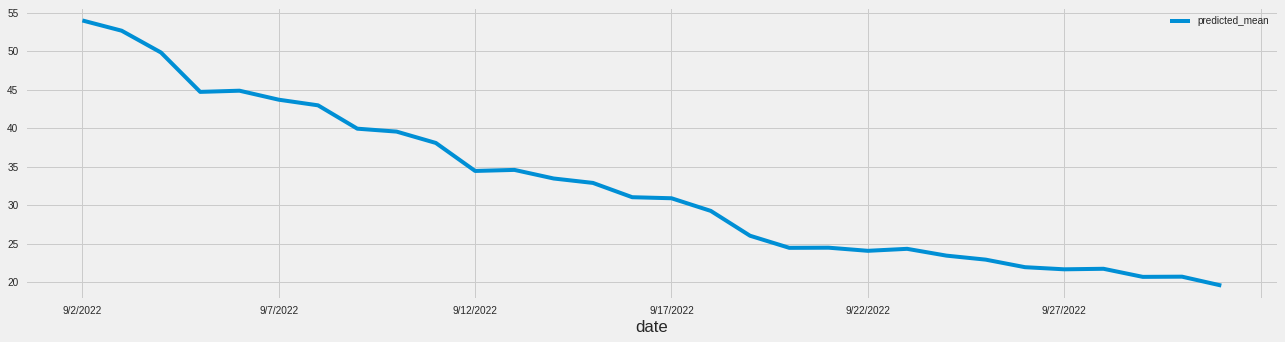

In [ ]:
modela=ARIMA(endog=train['icu_patients_per_million'],exog=train.iloc[:,0:5] ,order=(0,2,1),seasonal_order=(2,0,0,30) )
modela=modela.fit()
modela.summary()
start=len(traini)
end=len(traini)+len(testi)-1
pred=modela.predict(exog=testi.iloc[:,0:5],start=start,end=end)
pred.index=data3.index[start:end+1]
pred.plot(legend='ARIMA Predictions')

In [ ]:
pred=pd.DataFrame(pred)
pred=pred.iloc[7:,:]
predictions=pd.DataFrame(predictions)
predictions.values.tolist()
predictions=predictions[0]
predictions.values.tolist()
predictions


0    -1.276339
1    -2.580085
2    -0.524564
3    -0.578399
4    -0.644672
5     0.025233
6    -0.701361
7    -0.718103
8    -0.789020
9    -0.476760
10   -0.218758
11   -0.577869
12   -1.709205
13   -1.088251
14   -0.964438
15   -1.032614
16   -0.518006
17    0.186634
18   -0.028354
19   -0.519192
20   -0.216844
21    0.123059
22    0.344447
Name: 0, dtype: float32

In [ ]:
pred=np.array(pred)
pred= pred.tolist()
l= len(pred)
pred_final=[]
for i in range(l):
 temp = pred[i] + predictions[i]
 pred_final.append(temp)
 print(temp)
#error = mse(test.iloc[:23,-1],pred_final)
#print('Test MSE: %.3f' % error)
#Y = pd.DataFrame(testi.iloc[7:,-1])
pred_final = pd.DataFrame(pred_final)

#plt.plot(pred_final , color = 'r')
#plt.show()

[38.68538981]
[37.00331367]
[37.58030569]
[33.88717522]
[33.95666559]
[33.50825935]
[32.20788426]
[30.33191828]
[30.12471965]
[28.79278358]
[25.82090437]
[23.88890694]
[22.77598381]
[22.99130172]
[23.37231711]
[22.42077174]
[22.41473456]
[22.13750161]
[21.64501603]
[21.22363616]
[20.47457722]
[20.83972152]
[19.90712559]


In [ ]:
p2=pred_final
pred_final

,0
0,38.685390
1,37.003314
2,37.580306
3,33.887175
4,33.956666
5,33.508259
6,32.207884
7,30.331918
8,30.124720
9,28.792784


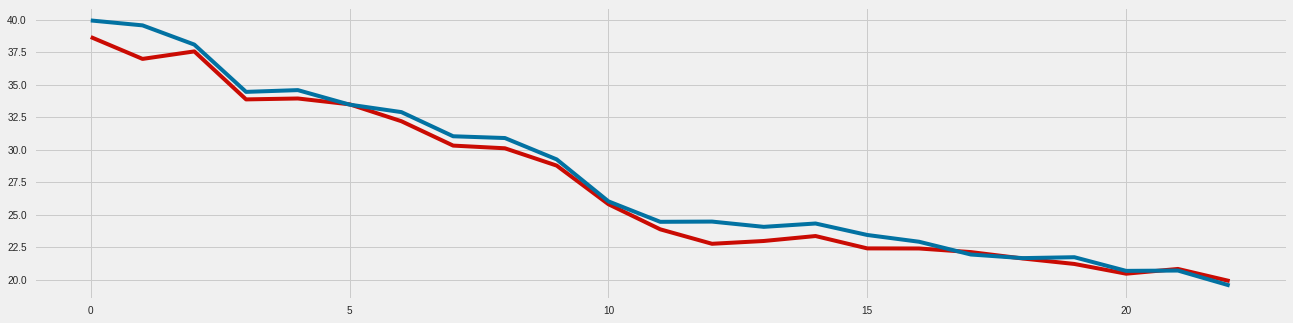

In [ ]:
plt.plot(pred_final , label="ARIMA+ANN", color = 'r')
plt.plot(pred , label="ARIMA", color = 'b')

plt.show()

#**Exporting Results**

In [ ]:
p1

NameError: ignored

In [ ]:
p2

NameError: ignored

In [ ]:
dst_center